<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Time_Series_Module3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>Assignment:4- ARIMA </center></h1></u>

Hello everyone and welcome back to the Assignment 4 of this module. Hope the module has been great till now!!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSlG9mqAsEiZcDNWBpDwiKtoTTdtMXTN2MvNA&usqp=CAU)

In this assignment you will be heading towards learning ARIMA model in time series forecasting.

<h2><u>Table of Contents:</h2></u>

1. Introduction to Time Series Forecasting<br>
2. Introduction to ARIMA Models<br>
3. What does the p, d and q in ARIMA model mean?<br>
4. AR and MA models<br>
5. Finding the order of differencing (d)<br>
6. Finding the order of the AR term (p)<br>
7. Finding the order of the MA term (q)<br>
8. Handling a slightly under or over differenced time series
9. How to build the ARIMA Model<br>
10. Out-of-Time Cross validation<br>
11. Accuracy Metrics for Time Series Forecast<br>

### Grab a cup of coffee so you are always on high energy :)) !! Let's begin.

<h2><u>Introduction to Time Series Forecasting</h2></u>

You have learnt that a time series is a collection of measurements taken at regular intervals. Forecasting is the next step in the process, and it involves predicting the series' future values. But what is the point of forecasting?
Because anticipating a time series (such as demand and sales) can be extremely profitable. Time series forecasting techniques and principles can be used to any business.

![](https://databricks.com/wp-content/uploads/2020/01/time-series-forecasting-prophet-prediction-chart.jpg)

A time series can now be separated into two forms of forecasting.

* Univariate Time Series Forecasting is when you utilise only the prior values of a time series to predict its future values.


* Multi Variate Time Series Forecasting is when you employ predictors other than the series (also known as exogenous variables) to forecast.

![](https://images.squarespace-cdn.com/content/v1/558412b1e4b02581df4f2488/1517577616338-V13OHMPDLN33Y19EQ5R6/Beginner%27s+Guide+to+Time+Series+Forecasting+v3.png?format=1000w)

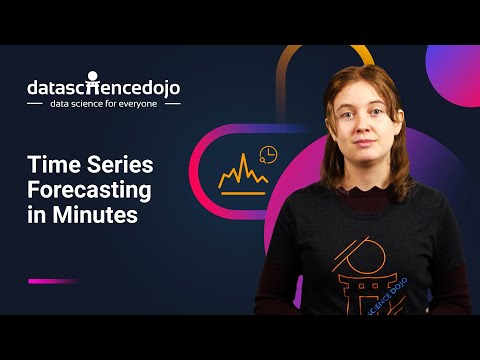

In [1]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('wGUV_XqchbE', width=700, height=400)

<h2><u>Introduction to ARIMA Models</h2></u>

**ARIMA (Auto Regressive Integrated Moving Average) is a class of models that 'explains' a time series based on its own previous values, that is, its own lags and lagged prediction errors, so that equation can be used to anticipate future values.**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSP3u3vROtDpfg62_T66Q6hMxnax4hTcUttaw&usqp=CAU)

ARIMA models can be used to model any 'non-seasonal' time series that has patterns and isn't random white noise.

Three terms define an ARIMA model: p, d, and q.

where p is the AR term's order, q is the MA term's order, and d is the number of differencings needed to render the time series stationary.
If a time series has seasonal trends, seasonal terms must be added, and the time series becomes SARIMA, short for 'Seasonal ARIMA.'

### Refer the video given below

In [2]:
YouTubeVideo('5pcYpYiqloU', width=700, height=400)

<h2><u>What does the p, d and q in ARIMA model mean</h2></u>

‘p’ is the order of the ‘Auto Regressive’ (AR) term. It's the number of lags that will be used as predictors. The order of the 'Moving Average' (MA) word is 'q.' It relates to how many lagged forecast errors should be included in the ARIMA Model. Which means how many previous errors should be considered in the model.

![](https://miro.medium.com/max/1448/1*kTx1d0HmZckSxf5BOaANGg.png)

Making the time series stationary is the first stage in creating an ARIMA model.
Because the word 'Auto Regressive' in ARIMA refers to a linear regression model in which the model's own lags are used as predictors. As you may be aware, linear regression models function best when the predictors are not correlated and are independent of one another. The most popular method is to differentiate it. That is, take the old value and subtract it from the present value. Depending on the complexity of the series, multiple differencing may be required at times.
As a result, the value of d is the smallest number of differencing required to render the series stationary. And d = 0 if the time series is already stationary.

In [3]:
YouTubeVideo('5pcYpYiqloU', width=700, height=400)

<h2><u>What are AR and MA models</h2></u>

A pure Auto Regressive (AR alone) model is one in which Yt(predicted value) is only determined by its own lags. To put it another way, Yt is a function of the 'lags of Yt.'

![](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png)

A pure Moving Average (MA alone) model is one in which Yt is only determined by lagged forecast errors(errors in previously forecasted values)

![](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png)

where the error terms are the errors of the respective lags' autoregressive models. The errors Et and E(t-1) correspond to the following equations' errors:

![](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-3-min.png)

So, what does an ARIMA model's equation look like?

An ARIMA model combines the AR and MA terms after the time series has been differenced at least once to make it stationary. So here's the equation:

![](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min-1024x91.png)

ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

Refer the below video for knowing more about AR models.

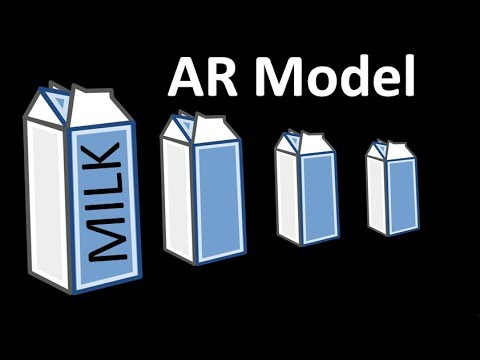

In [4]:
YouTubeVideo('5-2C4eO4cPQ', width=700, height=400)

Refer the below video for knowing more about MA models.

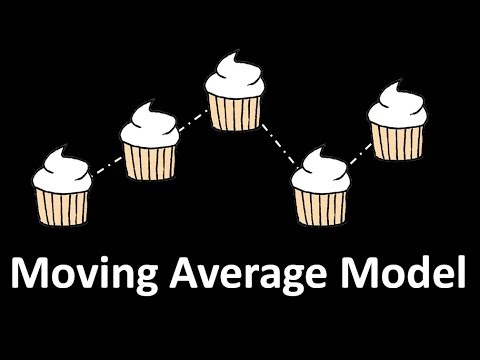

In [5]:
YouTubeVideo('voryLhxiPzE', width=700, height=400)

<h2><u>Finding the order of differencing (d)</h2></u>

The goal of differencing is to bring the time series to a standstill. However, you must be cautious not to over-difference the series. Because an over-differenced series may still be stationary, the model parameters will be affected. So, how do you figure out the proper differencing order? The least differencing required to obtain a near-stationary series that roams around a defined mean and the ACF plot quickly hits zero is the proper sequence of differencing.
If the autocorrelations are positive for a large number of lags (10 or more), the series should be differentiated further. If the lag 1 autocorrelation is too negative, on the other hand, the series is most likely over-differenced.


* <b>Let’s see how to do it with an example.</b>

First, we have to check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package. Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.



Lets start by importing some libraries.

* numpy: for array and matrix operations
* pandas: for storing and analysing data
* plot_acf,plot_pacf: plotting the ACF and PACF
* matplotlib: plotting graphs

In [6]:
#import the above mentioned libraries
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt


The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [7]:
# import drive from google.colab
import google.colab

# mount the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Next, load the dataset using read_csv method of pandas in the df variable.

Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1kxudm_al-IduTQl9cnDBgFScDs7mYNhP/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has one column having values recorded on increasing timescale. plot the dataset to visualize it.

,x
0,88
1,84
2,85
3,85
4,84


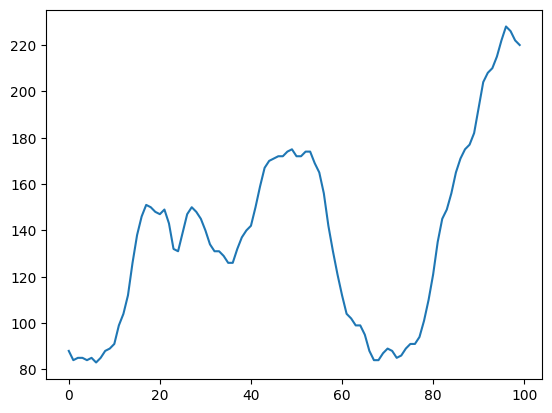

In [9]:
# copy the dataset path
url='/content/time_series.csv'



# read the data
pd=pd.read_csv('/content/time_series.csv')

# plot the dataset
plt.plot(pd)

# display top 5 rows
pd.head()


The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.
<br><br>
Import adfuller from statsmodels.tsa.stattools to implement the Augmented dickey fuller test.

In [10]:
# Import adfuller from statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

# apply adfuller to the dataset
adfuller(pd)

# print adf statistic
print(adfuller(pd)[0])

# print p value
print(adfuller(pd)[1])


-2.4642397172033674
0.12441935447109487


Because the P-value is higher than the significance level(0.05), we'll difference the series and observe how the autocorrelation plot appears.

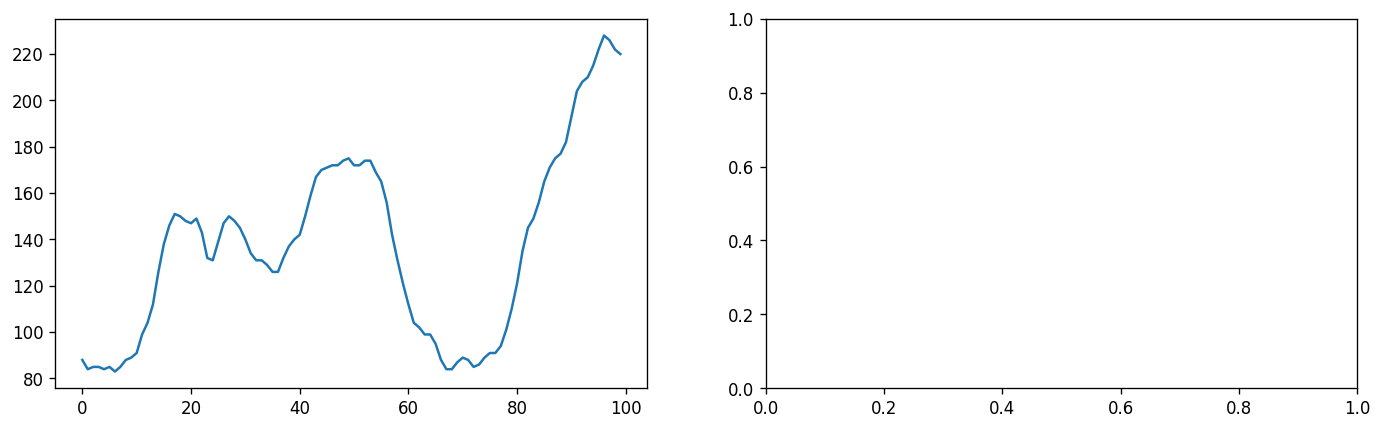

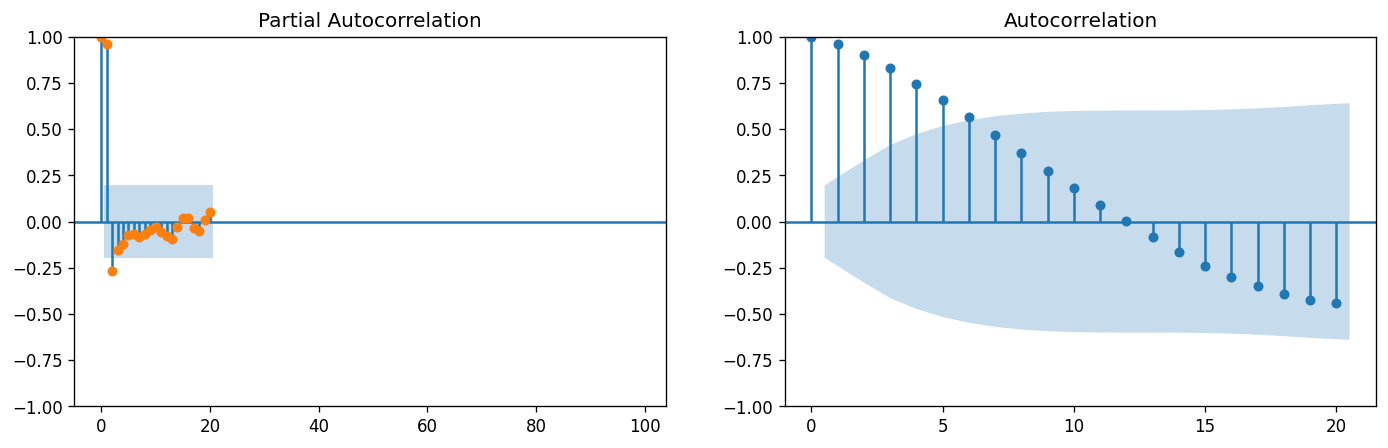

In [11]:
# Original Series
# create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,4))

# set figure size and dpi
fig.set_figwidth(14)

#plot the dataset on 0,0 axis
# plt.axis(0, 0).plot(df) # Incorrect: plt.axis() is not for plotting on subplots
axes[0].plot(pd)  # Correct: Use axes[row_index, col_index] to access subplot
plt.show()

# set the title
axes[0].set_title('Original Series')

#plot the original acf on 0,1 axis
plot_acf(pd, ax=axes[1]) # Correct: Pass the 'ax' argument to plot_acf
#plot_pacf(df.dropna(), ax=axes[0,2]) # Incorrect: There is no axes[0,2] with only 1 row and 2 columns
plot_pacf(pd.dropna(), ax=axes[0]) # Correct: Plot pacf on the first subplot


# 1st Differencing
# ... (rest of the code remains the same, but make sure to use 'pd' instead of 'df' for your DataFrame)

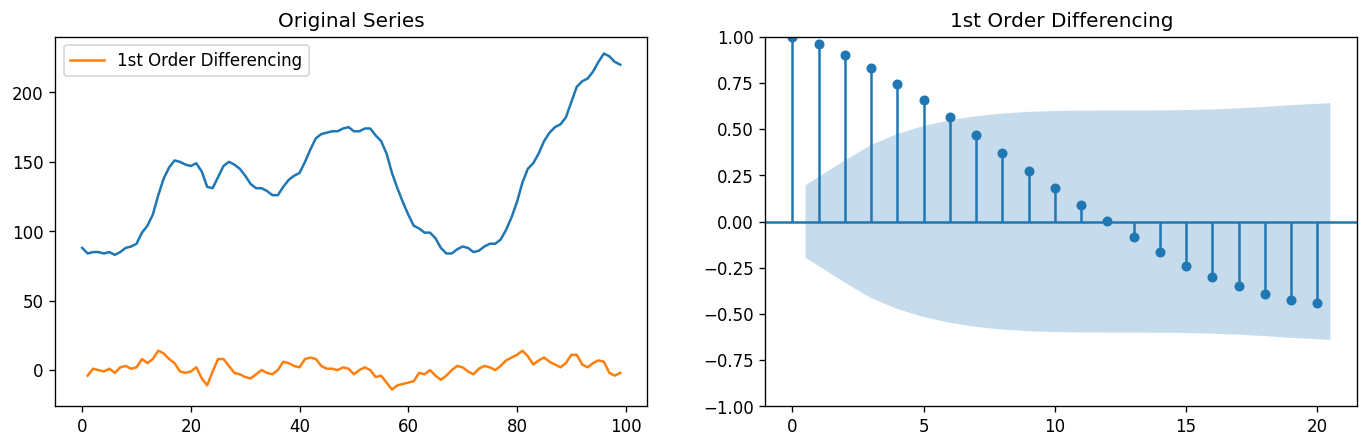

In [12]:
# Original Series
# create subplots
fig,axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,4))

# set figure size and dpi
fig.set_figwidth(14)


#plot the dataset on 0,0 axis
axes[0].plot(pd)
# set the title
axes[0].set_title('Original Series')

#plot the original acf on 0,1 axis
plot_acf(pd, ax=axes[1])

# 1st Differencing
#difference the dataset
df_diff = pd.diff().dropna()

#plot the dataset on 1,0 axis
#plt.axis(1, 0).plot(df_diff)
#axes[1].plot(df_diff)
#plt.show()

#set the title
axes[1].set_title('1st Order Differencing')

#plot the acf on 1,1 axis
#plot_acf(df.diff().dropna(), ax=axes[1, 1])
#plot_pacf(df.diff().dropna(), ax=axes[1,2])


# 2nd Differencing
#difference the dataset again
#df_diff2 = df_diff.diff().dropna()

#plot the dataset on 2,0 axis
#axes[2, 0].plot(df.diff().diff())
#axes[2].plot(df_diff2)
#plt.show()

#set the title
#axes[2].set_title('2nd Order Differencing')
#axes[2, 0].set_title('2nd Order Differencing')

#plot the acf on 2,1 axis
#plot_acf(df_diff2, ax=axes[2, 1])
#plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])
#plot_pacf(df.diff().diff().dropna(), ax=axes[2,2])
axes[0].plot(df_diff, label='1st Order Differencing')  # plotting on an existing subplot
axes[0].legend() # adding legend for better understanding
plt.show()



#show the plot
plt.show()


With two orders of differencing, the time series for the above series reaches stationarity. However, when looking at the autocorrelation plot for the second differencing, the lag quickly swings into the extreme negative zone, indicating that the series may have been over differed.

So, even if the series isn't entirely stationary, we will set the order of differencing to 1. (weak stationarity).

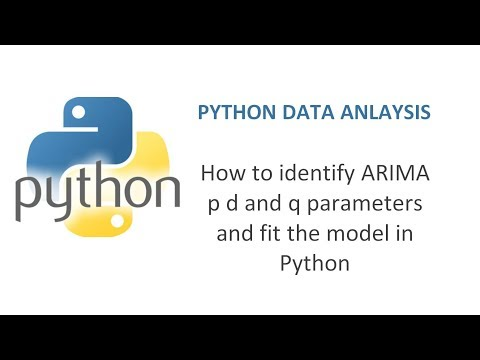

In [13]:
YouTubeVideo('bqvZL8Ww3aA', width=700, height=400)

<h2><u>Finding the order of the AR term (p)</h2></u>

The next stage is to determine whether or not the model requires any AR terms. The required number of AR terms can be determined by looking at the Partial Autocorrelation (PACF) diagram.
<br>
In the above plotted PACF for 1st differencing, You can observe that the PACF lag 1 is quite significant since is well above the significance line. Lag 2 turns out to be significant as well. Also lag 3 is significant managing to cross the significance limit (blue region). But we will fix the p as 2.


![](https://miro.medium.com/max/1352/1*fK8YjybKfHEU-4j44hGXJg.png)

<h2><u>Finding the order of the MA term (q)</h2></u>

You may look at the ACF plot for the number of MA terms in the same way that we looked at the PACF plot for the number of AR terms. Technically, the error of the lagged forecast is referred to as an MA term.

The ACF indicates the number of MA terms required to remove any autocorrelation from the stationarized series.

A few lags are significantly above the significance line. So, let's set q to 3 as a starting point.

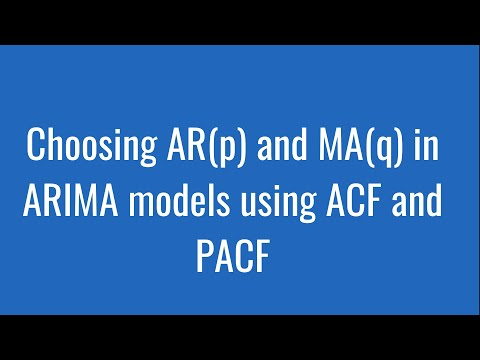

In [14]:
YouTubeVideo('ZTm8PJdFS-4', width=700, height=400)

<h2><u>Handling a slightly under or over differenced time series</h2></u>

It's possible that your series is little under-differenced, and that differencing it again causes it to be slightly over-differenced.

What is the best course of action in this situation?

If your series is under-differenced, adding one or more additional AR terms usually makes up for it. Similarly, if it's slightly over-differentiated, try adding another MA term.

<h2><u>Building the ARIMA model</h2></u>

You have everything you need to fit the ARIMA model now that you've identified the values of p, d, and q.
### Refer the given video

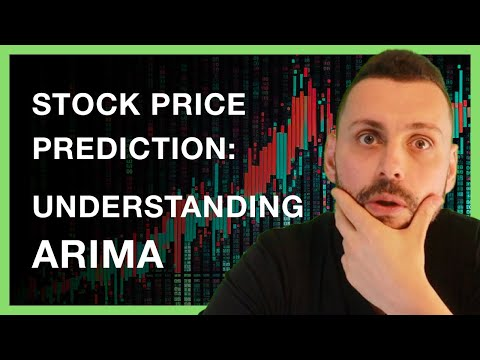

In [15]:
YouTubeVideo('gqryqIlvEoM', width=700, height=400)

Let's utilise the statsmodels package's ARIMA() implementation. Refer: https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html. Create the ARIMA model using the order as 2,1,3 which is our p,d,q. Fit the model keeping disp=0. https://docs.w3cub.com/statsmodels/generated/statsmodels.tsa.arima_model.arima.fit. Then print the model summary using the model_fit.summary() method.

In [16]:
#import Arima
from statsmodels.tsa.arima.model import ARIMA # Import the updated ARIMA class
# 2,1,3(p,d,q) ARIMA Model
model=ARIMA(pd,order=(2,1,3))
#fit the model
model_fit=model.fit
#print the model summary
print(model_fit)

<bound method ARIMA.fit of <statsmodels.tsa.arima.model.ARIMA object at 0x79c73ffb1090>>


The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

Notice here the coefficient of all the terms is not close to zero and the P-Value in ‘P>|z|’ column is less than 0.05. It should ideally be less than 0.05 for the respective X to be significant.

Let's look at the residuals to see if any patterns emerge (that is, look for constant mean and variance). We will plot the residuals by first loading them into a variable using the function pd.DataFrame(model_fit.resid). Also plot the Kernel density estimation using the plot function.

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -251.887
Date:                Wed, 23 Apr 2025   AIC                            515.774
Time:                        14:54:57   BIC                            531.345
Sample:                             0   HQIC                           522.074
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5641      0.505      1.118      0.264      -0.425       1.553
ar.L2          0.2410      0.345      0.698      0.485      -0.435       0.917
ma.L1          0.6227      0.504      1.236      0.2

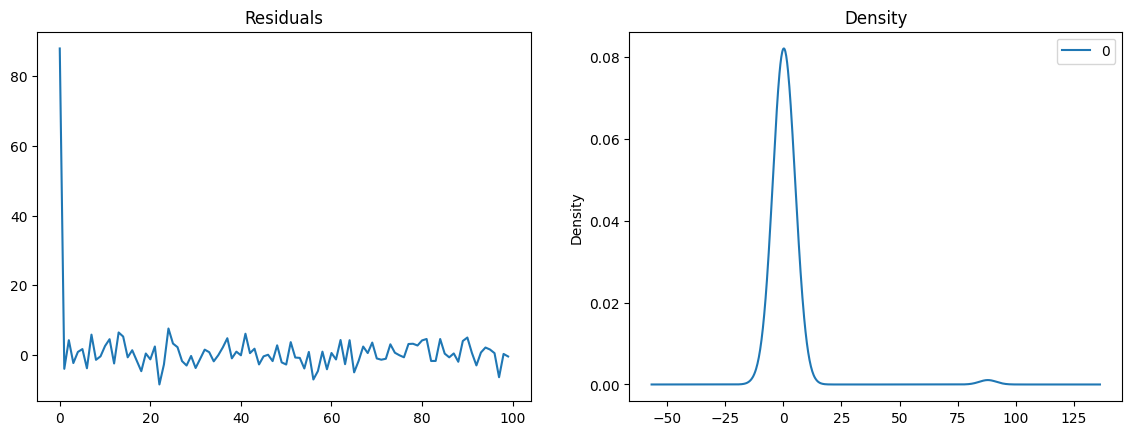

In [18]:
#import Arima
from statsmodels.tsa.arima.model import ARIMA # Import the updated ARIMA class
# 2,1,3(p,d,q) ARIMA Model
model=ARIMA(pd,order=(2,1,3))
#fit the model
model_fit=model.fit() # call the fit method to get the fitted model
#print the model summary
print(model_fit.summary()) # call the summary method of the fitted model to get the summary
# load residual errors
import pandas as pd_lib #import pandas with a different alias to avoid conflicts
residuals = pd_lib.DataFrame(model_fit.resid) # use pd_lib to access pandas functions
#create subplots
fig,ax = plt.subplots(1,2)
#fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,4))
#set figure size and dpi
fig.set_figwidth(14)
#plot residuals
ax[0].plot(residuals) # use ax[0] for first subplot
ax[0].set_title('Residuals')
#plot the density
residuals.plot(kind='kde', ax=ax[1]) # plot density on second subplot (ax[1])
ax[1].set_title('Density')
#show the plot
plt.show()

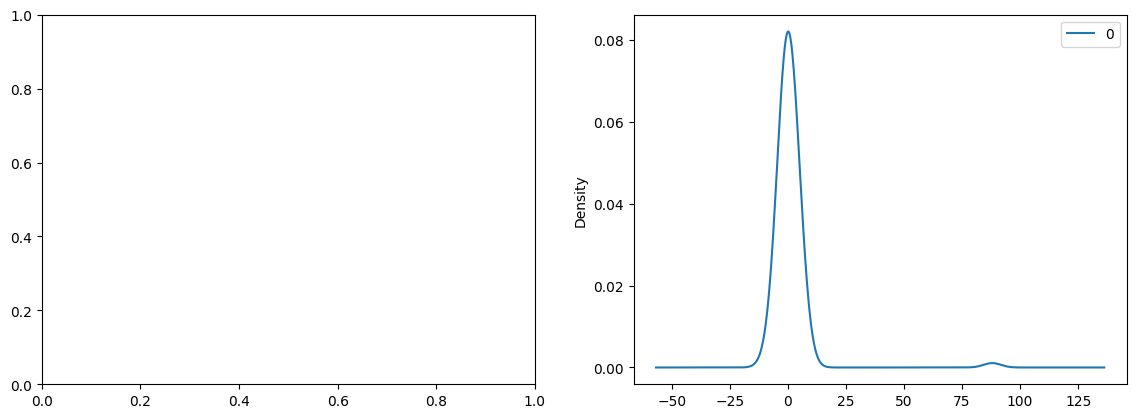

In [21]:
# load residual errors
residuals = pd_lib.DataFrame(model_fit.resid) # use pd_lib to access pandas functions
#create subplots
fig,ax = plt.subplots(1,2)
#fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,4))
#set figure size and dpi
fig.set_figwidth(14)
#plot residuals
axes[0].plot(residuals)
axes[0].set_title('Residuals')
#plot the density
#axes[1].plot(residuals.plot(kind='kde'))
residuals.plot(kind='kde', ax=ax[1]) # plot density on second subplot (ax[1])
axes[1].set_title('Density')
#show the plot
plt.show()




With a near-zero mean and uniform variance, the residual errors appear to be in good shape. Let's use plot_predict() to compare the actuals to the fitted values. The in-sample lagged data are used for prediction when dynamic=False is selected.

To put it another way, the model is trained up to the previous value before making the next prediction. This can make the fitted forecast and actuals appear overly optimistic.

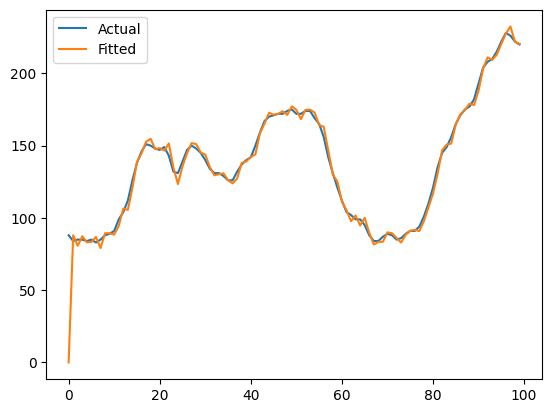

In [26]:
# Actual vs Fitted
# Get predictions
predictions = model_fit.predict()

# Plot predictions against actual values
# Assuming the first column contains the values, and it doesn't have a header
plt.plot(pd.iloc[:, 0], label='Actual')
plt.plot(predictions, label='Fitted')
plt.legend()
plt.show()

The ARIMA model seems pretty good as the actual and predicted values are quite close. Is that, however, the best option?

We can't say that at this time because we haven't predicted into the future and compared the forecast to actual results.

So, the Out-of-Time cross-validation is the real validation you need right now.

<h2><u>Out-of-Time Cross validation</h2></u>

Out-of-Time cross-validation involves taking a few steps back in time and forecasting into the future to the same number of steps back. The forecast is then compared to the actuals.

![](https://miro.medium.com/max/558/1*AXRu72CV1hdjLfODFGbMWQ.png)



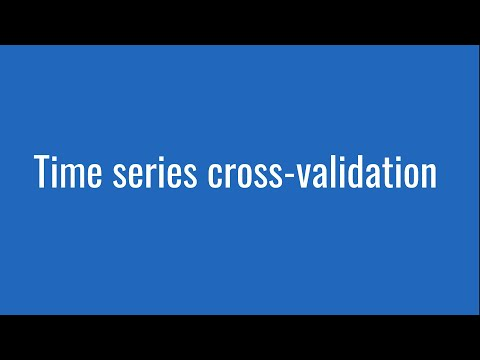

In [28]:
YouTubeVideo('iBAm2s-GFWM', width=700, height=400)

To perform out-of-time cross-validation, divide the time series into two contiguous portions in a 75:25 ratio or an acceptable proportion dependent on the series' time frequency.

You might wonder why I'm not sampling the training data at random.

Because the time series' order sequence must be preserved in order to be used for forecasting, this is the case.

In [29]:
# Create Training and Test
train=pd[:int(0.75*(len(pd)))]
test=pd[int(0.75*(len(pd))):]


Its time to build the model on the testing data. Use the order 1,1,1 in the first case. Keep disp=-1 while fitting the model. Forecast the series using the forecast method. It takes two values, first number of values to be forecasted and second the alpha value which decides the confidence level. https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html.It returns the forecasted values and also the values for confidence region(upper and lower).  Next prepare pandas series of the forecasted data, lower series and upper series using pd.Series. Plot the training data, testing data next forecasted 15 values.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


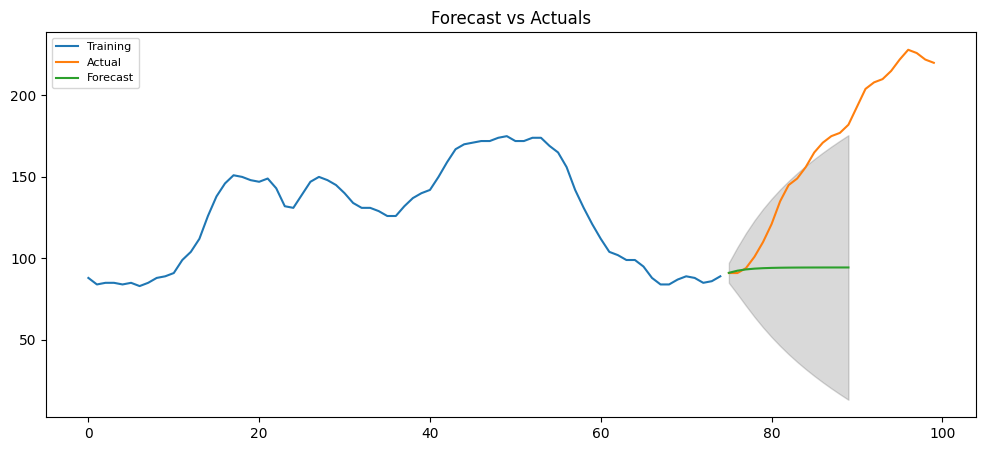

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming train and test are already defined as pandas Series
# Example: train = pd.Series([...]), test = pd.Series([...])

# Initialize model using orders=(1,1,1)
model = ARIMA(train, order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Get forecast results
forecast_results = model_fit.get_forecast(steps=15, alpha=0.05)  # 95% conf

# Extract forecasted values
forecast = forecast_results.predicted_mean

# Extract confidence intervals
conf = forecast_results.conf_int()

# Make pandas series for forecasted data
forecasted_data = pd.Series(forecast, index=test.index[:15])  # Adjust index as needed

# Make pandas series for lower and upper series
lower_series = pd.Series(conf.iloc[:, 0], index=test.index[:15])  # Lower bound
upper_series = pd.Series(conf.iloc[:, 1], index=test.index[:15])  # Upper bound

# Set figure size and dpi
plt.figure(figsize=(12, 5), dpi=100)

# Plot training data
plt.plot(train, label='Training')

# Plot testing data
plt.plot(test, label='Actual')

# Plot forecasted data
plt.plot(forecasted_data, label='Forecast')

# Fill the area between lower and upper series
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)

# Set title
plt.title('Forecast vs Actuals')

# Set legend
plt.legend(loc='upper left', fontsize=8)
plt.show()

The ARIMA(1,1,1) model appears to provide a directionally correct forecast based on the graph. The actual observed values are also within the 95% confidence interval. That appears to be satisfactory.
However, each of the forecasts is consistently lower than the actuals. That is to say, if we add a little constant to our projection, the accuracy will undoubtedly improve. As a result, there is room for improvement. We will now use orders as 3,2,1 and then check the results.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


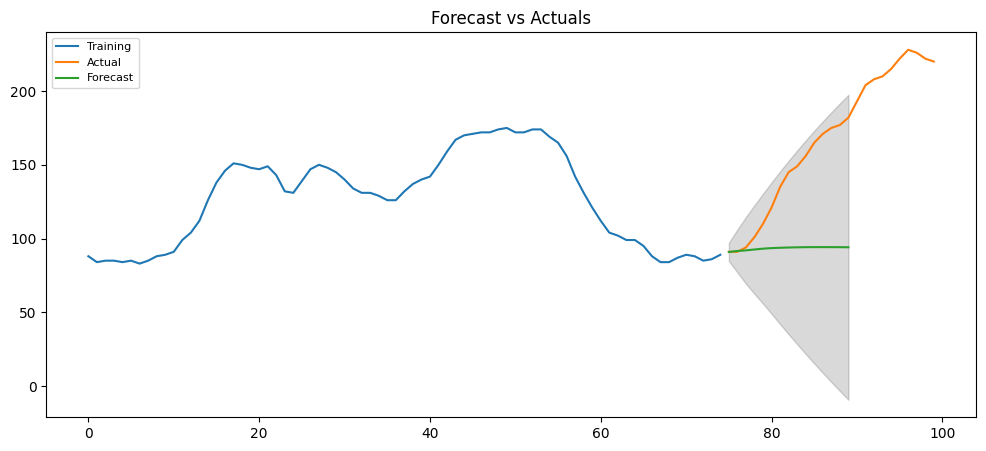

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your time series DataFrame and 'train' and 'test' are defined
# Example: train = data['your_column'][:train_size], test = data['your_column'][train_size:]

# Initialize model using orders=(3,2,1)
model = ARIMA(train, order=(3, 2, 1))

# Fit the model
model_fit = model.fit()

# Forecast the series for 15 values
forecast_results = model_fit.get_forecast(steps=15, alpha=0.05)  # 95% confidence interval
forecast = forecast_results.predicted_mean
conf = forecast_results.conf_int()

# Make pandas series for forecasted data
forecasted_data = pd.Series(forecast, index=test.index[:15])  # Adjust index as needed

# Make pandas series for lower and upper series
lower_series = pd.Series(conf.iloc[:, 0], index=test.index[:15])  # Lower bound
upper_series = pd.Series(conf.iloc[:, 1], index=test.index[:15])  # Upper bound

# Make pandas series for next 15 actual values (if available)
# Replace with your actual next 15 values if you have them
# For example, if you have actual values in a list:
# next_actual_values = [value1, value2, ..., value15]
# next_actual_series = pd.Series(next_actual_values, index=test.index[:15])

# Set figure size and dpi
plt.figure(figsize=(12, 5), dpi=100)

# Plot training data
plt.plot(train, label='Training')

# Plot testing data (actual values)
plt.plot(test, label='Actual')

# Plot forecasted data
plt.plot(forecasted_data, label='Forecast')

# Fill the area between lower and upper series
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)

# Set title
plt.title('Forecast vs Actuals')

# Set legend
plt.legend(loc='upper left', fontsize=8)
plt.show()

The AIC has reduced to 440 from 515. Good. The P-values of the X terms are less the < 0.05, which is great.

So overall it’s much better.

Ideally, you should look back at numerous points in time, such as one, two, three, and four quarters, to see how your forecasts have performed over the year.

Here's a fun way to practise: Try going back to data points 27, 30, 33, and 36 to see how the forecasts fare. Various accuracy metrics are discussed next, and they can be used to evaluate forecast performance.

<h2><u>Accuracy Metrics for Time Series Forecast</h2></u>

The commonly used accuracy metrics to judge forecasts are:


1. Mean Absolute Percentage Error (MAPE)
2. Mean Error (ME)
3. Mean Absolute Error (MAE)
4. Mean Percentage Error (MPE)
5. Root Mean Squared Error (RMSE)
6. Lag 1 Autocorrelation of Error (ACF1)
7. Correlation between the Actual and the Forecast (corr)
8. Min-Max Error (minmax)

When comparing forecasts from two separate series, the MAPE, Correlation, and Min-Max Error are commonly utilised.

Why not make use of some of the other metrics?

Because only the first three are percentage errors with values ranging from 0 to 1. That manner, regardless of the scale of the series, you can determine how good the prognosis is.

The other error metrics are quantities. This means that an RMSE of 100 for a series with a mean in the 1000s is better than an RMSE of 5 for a series with a mean in the tens. As a result, you can't properly compare the forecasts of two different scaled time series with them.

In our implementation, we will find the MAPE for analysing the performance. Know more about MAPE: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

In [54]:
# Accuracy metrics
# get the predicted and actual values
forecast = model_fit.predict()
actual = test


#get the mape
mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE

#print the mape
print(mape)





nan


Around 12.75% MAPE implies the model is about 87.25% accurate in predicting the next 15 observations which is not really bad.

Now you know how to forecast a time series using ARIMA!!

In this assignment, you discovered how to build a ARIMA model for time series forecasting.

Specifically, you learned:

* What is time series forecasting?
* What is ARIMA?
* How to find p,d,q orders?
* Building the ARIMA model
* Performing cross validation and using performance metrics for the ARIMA model


Keep practising until next assignment comes in. <br><br>
## Do fill the feedback form given below:
[Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)
<br><br> See you then!!

![](https://i.etsystatic.com/7773073/r/il/e8fb10/1580602882/il_570xN.1580602882_47yp.jpg)